In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
#loading in the dataset
df = pd.read_csv("Market Basket Analysis - Groceries_dataset.csv")

#displaying the first five rows of the dataset
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
#displaying the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
#displaying the number of rows and columns
df.shape

(38765, 3)

In [6]:
#checking for missing values
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
#displaying the summary statistics of the dataset
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Member_number,38765.0,NaN,NaN,NaN,3003.641868,1153.611031,1000.0,2002.0,3005.0,4007.0,5000.0
Date,38765,728,21-01-2015,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
itemDescription,38765,167,whole milk,2502,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [8]:
#converting the date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [9]:
#displaying the number of unique items in the the Item Desciption Column

df["itemDescription"].nunique()

167

In [10]:
#displaying the number of the most bought items

df["itemDescription"].value_counts()

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

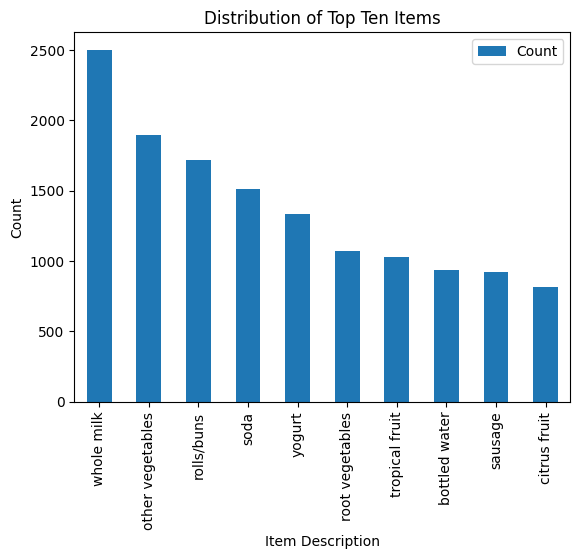

In [11]:
#displaying the top 10 items bought
item_count = df.groupby("itemDescription").size().reset_index(name="Count").sort_values(by= "Count", ascending=False).head(10)

item_count.plot(kind="bar", x="itemDescription", y="Count")
plt.title("Distribution of Top Ten Items")
plt.xlabel("Item Description")
plt.ylabel("Count");

It can be deduced that the most bought item is Whole milk followed by other vegetables and rolls/buns

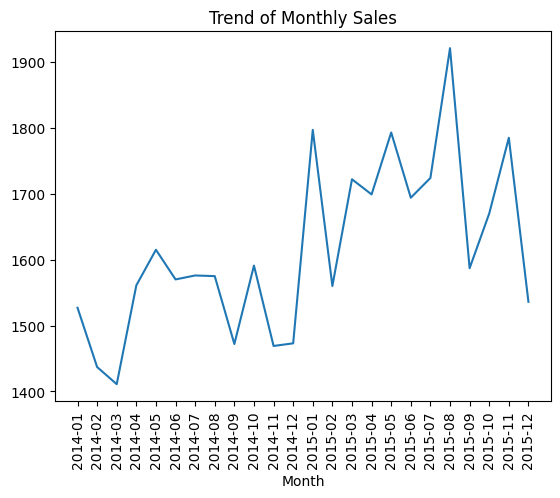

In [12]:
#displaying the trend of Monthly sales
df["Month"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month").size()

sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.xticks(rotation=90)
plt.title("Trend of Monthly Sales");

It can be deduced that the month that experience the most sales is August, 2015

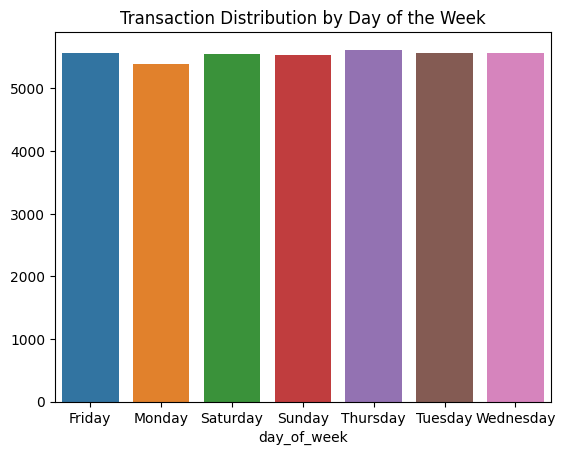

In [13]:
#displaying the ndistribution of transaction on a daily basis
df["day_of_week"] = df["Date"].dt.day_name()
transactions_by_day = df.groupby("day_of_week").size()

sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values)
plt.title("Transaction Distribution by Day of the Week");

It can be deduced that there is little to no difference in the transaction made on a daily basis

c:\ProgramData\Anaconda3\envs\araenv\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


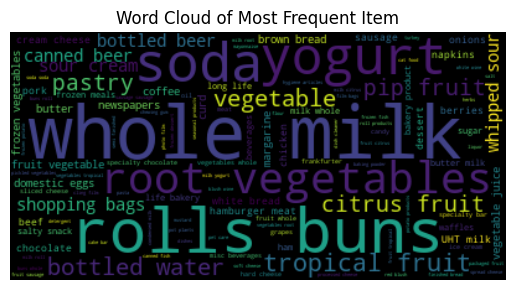

In [14]:
#displaying the most frequent item usin wordcloud
text = " ".join(map(str, df["itemDescription"]))
        
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Item");

It can be deduced that the most frequent items are also the most bought items which include whole milk, rolls/buns. root vegetable, yoghurt and soda.

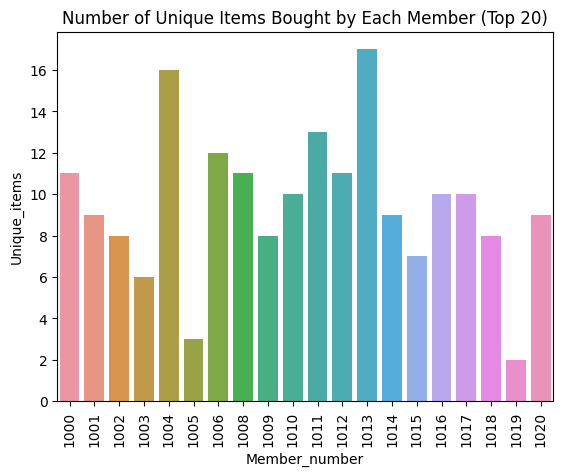

In [15]:
#displaying the number of unique items bought by each member
unique_items_by_members = df.groupby("Member_number")["itemDescription"].nunique().reset_index(name="Unique_items").head(20)

sns.barplot(x="Member_number", y= "Unique_items", data=unique_items_by_members)
plt.xticks(rotation=90)
plt.title("Number of Unique Items Bought by Each Member (Top 20)");

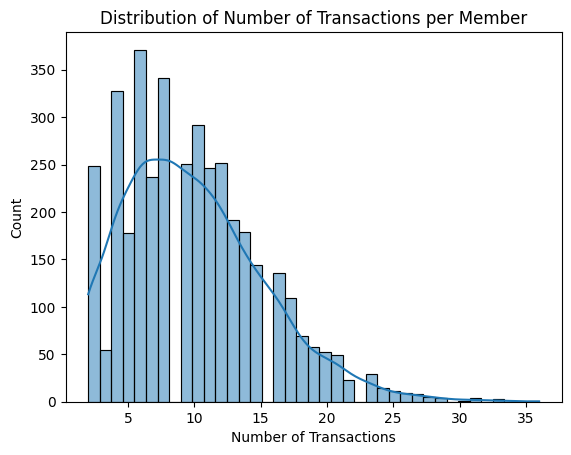

In [16]:
#displaying the distribution of numnber of transactions by each member
sns.histplot(df["Member_number"].value_counts(), kde=True)
plt.xlabel("Number of Transactions")
plt.title("Distribution of Number of Transactions per Member");

It can be deduced that the transaction distribution is right skewed, this shows as the number of transaction increases the count of members decreases

In [17]:
#grouping all items purchased per member per day into a single basket
df["Unique_Transactions"] = df["Member_number"].astype(str) + "_" + df["Date"].astype(str)

#displaying the first five rows of the dataframe
df.head()

,Member_number,Date,itemDescription,Month,day_of_week,Unique_Transactions
0,1808,2015-07-21,tropical fruit,2015-07,Tuesday,1808_2015-07-21
1,2552,2015-01-05,whole milk,2015-01,Monday,2552_2015-01-05
2,2300,2015-09-19,pip fruit,2015-09,Saturday,2300_2015-09-19
3,1187,2015-12-12,other vegetables,2015-12,Saturday,1187_2015-12-12
4,3037,2015-02-01,whole milk,2015-02,Sunday,3037_2015-02-01


In [18]:
#using member 1187 as example, checking what the member bought 
member = df[df["Member_number"] == 1187].sort_values("Date") 
member.head(10)

,Member_number,Date,itemDescription,Month,day_of_week,Unique_Transactions
10958,1187,2014-06-08,soda,2014-06,Sunday,1187_2014-06-08
27107,1187,2014-06-08,soda,2014-06,Sunday,1187_2014-06-08
13614,1187,2014-11-09,citrus fruit,2014-11,Sunday,1187_2014-11-09
29763,1187,2014-11-09,domestic eggs,2014-11,Sunday,1187_2014-11-09
3,1187,2015-12-12,other vegetables,2015-12,Saturday,1187_2015-12-12
16152,1187,2015-12-12,onions,2015-12,Saturday,1187_2015-12-12
36091,1187,2015-12-12,shopping bags,2015-12,Saturday,1187_2015-12-12


### Apriori Algorithm

In [19]:
#using pd.get dummies for encoding and storing it in a variable basket
basket = pd.get_dummies(df["itemDescription"], dtype=int)

#displaying the first five rows of the encoded datatframe
basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
#creating a new column for member number in the basket dataframe
basket["Member_number"] = df["Member_number"]

#grouping the basket df by Member number
basket = basket.groupby("Member_number").sum()

#displaying the first five rows of the basket df
basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [21]:
#writing a function to encode number greater than or equal to 1 to 1 and number less than or equal to 0 to 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 0:
        return 1

#applying the function and storing it in a new variable called basket sets
basket_sets = basket.applymap(encode_units)

In [22]:
#applying the apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets

c:\ProgramData\Anaconda3\envs\araenv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
160,0.050539,"(other vegetables, whole milk, tropical fruit)"
161,0.071832,"(other vegetables, whole milk, yogurt)"
162,0.065162,"(soda, whole milk, rolls/buns)"
163,0.065931,"(whole milk, rolls/buns, yogurt)"


In [23]:
#applying the association rules and using the metric as lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(beef),0.376603,0.119548,0.050795,0.134877,1.128223,0.005773,1.017719,0.182309
1,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
2,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
3,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
4,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857


In [24]:
#displaying the items with a lift grater than 1 nand confidence level greater than 0.5
rules[(rules["lift"] >= 1) & (rules["confidence"] >=0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
10,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
23,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
31,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,0.007481,1.113034,0.124087
35,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,0.008239,1.136661,0.142501
43,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795,0.158299
64,(curd),(whole milk),0.120831,0.458184,0.063622,0.526539,1.149188,0.008259,1.144374,0.147663
70,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766,0.152421
80,(frozen vegetables),(whole milk),0.102617,0.458184,0.055156,0.537500,1.173110,0.008139,1.171495,0.164439
90,(margarine),(whole milk),0.116983,0.458184,0.059518,0.508772,1.110410,0.005918,1.102983,0.112605


A lift of 1.120777 suggests that when customers buy one item (antecedents), they are more likely to buy another specific item (consequent) compared to when they don't buy at all
It indicates a modest but positive relationship. People who buy the antecedents are somewhat inclined to buy the consequent

A confidence interval greater than 5 suggests that this association is statistically significant. It's not likely due to random chances